# importing base libraries

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import re

In [90]:
types = pd.read_csv(r'C:\Users\aitpa\Desktop\23.02 IRDM FINAL\datasets\types.csv', sep=';')
codes = pd.read_csv(r'C:\Users\aitpa\Desktop\23.02 IRDM FINAL\datasets\codes.csv',sep =';')
transactions = pd.read_csv(r'C:\Users\aitpa\Desktop\23.02 IRDM FINAL\datasets\transactions.csv', sep =';')
train_set = pd.read_csv(r'C:\Users\aitpa\Desktop\23.02 IRDM FINAL\datasets\train_set.csv',sep=';')

In [91]:
test_set = pd.read_csv(r'C:\Users\aitpa\Desktop\23.02 IRDM FINAL\datasets\test_set.csv',sep=';')

In [92]:
test_set.head()

,client_id
0,61240380
1,34114030
2,15926722
3,50598019
4,76475250


# Dataset exploring

## Transactions

### Descriptive Analysis

In [239]:
transactions.describe()

,client_id,code,type,sum
count,1.300390e+05,130039.000000,130039.000000,1.300390e+05
mean,5.086859e+07,5594.629996,2489.372135,-1.812909e+04
std,2.872854e+07,606.087084,2253.296578,5.584445e+05
min,2.289900e+04,742.000000,1000.000000,-4.150030e+07
25%,2.577174e+07,5211.000000,1030.000000,-2.244916e+04
50%,5.235837e+07,5641.000000,1110.000000,-5.502490e+03
75%,7.506302e+07,6010.000000,2370.000000,-1.122960e+03
max,9.999968e+07,9402.000000,8145.000000,6.737747e+07


In [240]:
transactions.median() #median

client_id    52358368.00
code             5641.00
type             1110.00
sum             -5502.49
dtype: float64

In [241]:
transactions.mode() #mode

,client_id,datetime,code,type,sum
0,70780820,456 00:00:00,6011,1010,-2245.92


In [242]:
max(transactions['sum'])-min(transactions['sum']) #Measures of spread

108877774.3

In [243]:
transactions['sum'].quantile(0.75)-transactions['sum'].quantile(0.25) #IQR

21326.2

In [244]:
transactions['sum'].var() #variance

311860284637.53296

### Explanatory Data Analysis

In [245]:
# 1. Understanding the data ################################################################################################

In [246]:
transactions.head()

,client_id,datetime,code,type,sum
0,96372458,421 06:33:15,6011,2010,-561478.94
1,24567813,377 17:20:40,6011,7010,67377.47
2,21717441,55 13:38:47,6011,2010,-44918.32
3,14331004,263 12:57:08,6011,2010,-3368873.66
4,85302434,151 10:34:12,4814,1030,-3368.87


In [247]:
transactions.shape

(130039, 5)

In [248]:
transactions.columns

Index(['client_id', 'datetime', 'code', 'type', 'sum'], dtype='object')

In [249]:
transactions.nunique()

client_id      8656
datetime     114770
code            175
type             67
sum           27450
dtype: int64

In [250]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130039 entries, 0 to 130038
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   client_id  130039 non-null  int64  
 1   datetime   130039 non-null  object 
 2   code       130039 non-null  int64  
 3   type       130039 non-null  int64  
 4   sum        130039 non-null  float64
dtypes: float64(1), int64(3), object(1)
memory usage: 5.0+ MB


In [251]:
# 2. Cleaning the data ################################################################################################

In [252]:
transactions.isnull().sum()

client_id    0
datetime     0
code         0
type         0
sum          0
dtype: int64

In [19]:
clients = np.array(transactions['client_id'].unique())
clients

array([96372458, 24567813, 21717441, ..., 44107368, 54180380, 12610287],
      dtype=int64)

In [20]:
len(clients)

8656

In [21]:
#length of the DF before dropping duplicates
len_a = len(transactions)

In [23]:
#difference between length after duplicate dropping
transactions = transactions.drop_duplicates()
len_b=len(transactions)
len_a-len_b

29

In [24]:
# 3. Realtionship analysis ################################################################################################

In [25]:
correlation = transactions.corr()

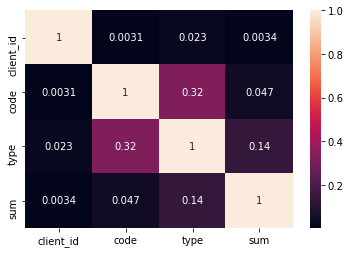

In [26]:
sns.heatmap(correlation, xticklabels = correlation.columns, yticklabels=correlation.columns, annot=True)
plt.show()

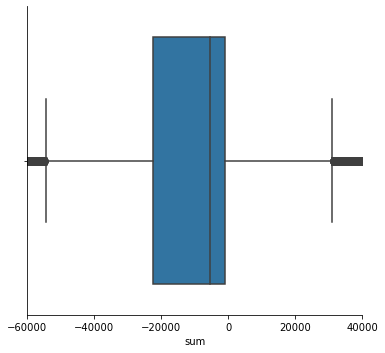

In [27]:
sns.catplot(x='sum',kind='box',data=transactions )
plt.xlim(-60000,40000)
plt.show()

# Codes

## Descriptive Statistics

In [28]:
#1 getting information about codes
codes.shape

(184, 2)

In [29]:
codes.info()
codes.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   code              184 non-null    int64 
 1   code_description  184 non-null    object
dtypes: int64(1), object(1)
memory usage: 3.0+ KB


,code,code_description
0,5944,"Магазины по продаже часов, ювелирных изделий и..."
1,5621,Готовые сумочные изделия
2,5697,"Услуги по переделке, починке и пошиву одежды"
3,7995,Транзакции по азартным играм
4,5137,"Мужская, женская и детская спец-одежда"


In [30]:
codes.isnull().sum()

code                0
code_description    0
dtype: int64

In [31]:
print('Number of dublicated rows in codes: ', codes.duplicated(keep=False).sum())

Number of dublicated rows in codes:  0


In [32]:
codes.describe()

,code
count,184.000000
mean,6046.793478
std,1470.328104
min,742.000000
25%,5208.250000
50%,5813.500000
75%,7283.000000
max,9402.000000


In [33]:
codes.describe(include=['object'])

,code_description
count,184
unique,184
top,Прямой маркетинг — торговые точки подписки
freq,1


# Types


### Descriptive Statistics

In [34]:
types.shape

(155, 2)

In [35]:
types.info()
types.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   type              155 non-null    int64 
 1   type_description  155 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.5+ KB


,type,type_description
0,8001,Установление расх. лимита по карте
1,2411,Перевод с карты на счет др.лица в одном тер. б...
2,4035,н/д(нет данных)
3,3001,Комиссия за обслуживание ссудного счета
4,2420,Перевод с карты на счет физ.лица в другом тер....


In [36]:
types.isnull().sum()

type                0
type_description    0
dtype: int64

In [37]:
print('Number of dublicated rows in types: ', types.duplicated(keep=False).sum() )

Number of dublicated rows in types:  0


In [38]:
types.describe()

,type
count,155.000000
mean,10819.045161
std,80000.258847
min,1000.000000
25%,2385.500000
50%,4040.000000
75%,7027.500000
max,999999.000000


In [128]:
types.describe(include=['object'])

,type_description
count,155
unique,139
top,н/д
freq,13


# Feature Engineering

# Types
After studying the dataset, we found out that there are rows in types that do not carry information significant, namely, there were several rows without a description. Therefore, we decided to combine them into one type.

In [93]:
types['type_description'].value_counts()

н/д                                                                                                 13
Покупка. POS                                                                                         2
Взнос наличных через POS                                                                             2
Наличные.                                                                                            2
Покупка.                                                                                             2
                                                                                                    ..
Перевод средств с карты на счет клиента по поручению автомат.                                        1
Списание с карты по операции “перевода с карты на карту” через POS (в пределах одного тер.банка)     1
Списание с карты по операции “перевода с карты на карту” через АТМ (в пределах одного тер.банка)     1
Плата за предоставление отчета по счету карты почтой                     

In [94]:
nan_values = types[types['type_description'].str.contains('н/д')]
nan_values

,type,type_description
2,4035,н/д(нет данных)
15,2440,н/д
16,2360,н/д
19,1310,н/д
39,4600,н/д
54,4090,н/д
60,3810,н/д
63,4045,н/д
68,7084,н/д
84,1410,н/д


In [95]:
types.drop(types[types['type_description'].str.contains('н/д')].index, inplace=True)
list_types = nan_values['type'].tolist()
transactions.loc[transactions['type'].isin(list_types), 'type'] = 4035

In [96]:
types.drop(types[types['type_description'].str.contains('XXX')].index,inplace=True)

In [97]:
types.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140 entries, 0 to 154
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   type              140 non-null    int64 
 1   type_description  140 non-null    object
dtypes: int64(1), object(1)
memory usage: 3.3+ KB


# Transactions

In [98]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import string
import nltk
from nltk.corpus import stopwords

### Adding gender

In [99]:
transactions.groupby('client_id').count()

,datetime,code,type,sum
client_id,,,,
22899,9,9,9,9
27914,4,4,4,4
28753,13,13,13,13
31385,13,13,13,13
38084,26,26,26,26
...,...,...,...,...
99967537,1,1,1,1
99984336,4,4,4,4
99985917,1,1,1,1


In [102]:
train_set.head()

,client_id,target
0,75063019,0
1,86227647,1
2,6506523,0
3,50615998,0
4,95213230,0


In [103]:
transactions.head()

,client_id,datetime,code,type,sum
0,96372458,421 06:33:15,6011,2010,-561478.94
1,24567813,377 17:20:40,6011,7010,67377.47
2,21717441,55 13:38:47,6011,2010,-44918.32
3,14331004,263 12:57:08,6011,2010,-3368873.66
4,85302434,151 10:34:12,4814,1030,-3368.87


In [104]:
train_set.head()

,client_id,target
0,75063019,0
1,86227647,1
2,6506523,0
3,50615998,0
4,95213230,0


In [105]:
#merging transactions with train set and marking clients by their gender
gender_fm = pd.DataFrame(train_set.groupby('client_id')['target'].min()).reset_index()
# creating the merged dataframe to store values 
merged = pd.merge(transactions,gender_fm, on='client_id')

#### dividing date and time

In [106]:
import datetime
start = datetime.datetime.strptime("31-08-2014", "%d-%m-%Y")
end = datetime.datetime.strptime("01-12-2015", "%d-%m-%Y")
date_generated = pd.date_range(start, end)
date_df = pd.DataFrame(date_generated.strftime("%d-%m-%Y")).reset_index()

In [107]:
date_df.rename(columns = {'index' : 'day', 0 : 'date'}, inplace =True)

In [108]:
merged[['day', 'time']] = merged['datetime'].str.split(' ', 1, expand=True)

In [109]:
merged = merged.astype({'day': 'int64'})
merged = merged.sort_values('day', ascending = True)

In [110]:
merged = merged.merge(date_df)
merged = merged.drop(['datetime'], axis=1)
merged = merged.drop(['day'], axis=1)

In [111]:
merged.head()

,client_id,code,type,sum,target,time,date
0,87953844,4829,2330,-21785.38,1,19:43:19,31-08-2014
1,45421659,6011,2010,-112295.79,1,10:19:12,31-08-2014
2,84203354,5541,1110,-14059.43,1,12:38:20,31-08-2014
3,97098016,4814,1030,-2245.92,1,18:27:54,31-08-2014
4,61628505,6011,4011,-1347.55,0,15:05:27,31-08-2014


In [112]:
time_list = []
for i in merged['time'].to_list():
    time_list.append(i[0:5])

In [113]:
merged['time'] = time_list
merged['datetime'] = merged['time'] + ' ' + merged['date']

In [114]:
merged['date_time'] = pd.to_datetime(merged['datetime'])

In [115]:
merged = merged.drop(['time', 'date', 'datetime'], axis=1)

In [116]:
merged['week_day'] = merged['date_time'].dt.dayofweek

In [117]:
merged_days = merged.sort_values('client_id')
merged_days.head()

,client_id,code,type,sum,target,date_time,week_day
10744,22899,5541,1010,-4491.83,1,2014-05-11 14:42:00,6
42317,22899,6011,2110,-6737.75,1,2015-04-19 09:31:00,6
66339,22899,6011,7010,44918.32,1,2015-10-08 11:45:00,3
28955,22899,4814,1030,-1122.96,1,2015-02-14 09:50:00,5
39855,22899,5399,1110,-4626.59,1,2015-09-04 18:54:00,4


In [118]:
try_1 = merged.sort_values('client_id')
try_1 = try_1['week_day']

In [119]:
count_mtx_2 = []
for j in try_1.to_list():
        if j == 0:
            j = 'Monday'
        elif j == 1:
            j = 'Tuesday'
        elif j == 2:
            j = 'Wednesday'
        elif j == 3:
            j = 'Thursday'
        elif j == 4:
            j = 'Friday'
        elif j == 5:
            j = 'Saturday'
        else:
            j = 'Sunday'
        count_mtx_2.append(j)

In [120]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(count_mtx_2)

In [121]:
days_freaquency = pd.DataFrame(X.toarray())
days_freaquency = days_freaquency.rename(columns=dict(zip(days_freaquency.columns, vectorizer.get_feature_names())))
days_freaquency.head()

,friday,monday,saturday,sunday,thursday,tuesday,wednesday
0,0,0,0,1,0,0,0
1,0,0,0,1,0,0,0
2,0,0,0,0,1,0,0
3,0,0,1,0,0,0,0
4,1,0,0,0,0,0,0


In [122]:
merged = merged.sort_values('client_id').reset_index()
merged = pd.concat([merged, days_freaquency], axis=1)

In [123]:
merged.drop(['index'], axis=1, inplace = True)


In [124]:
merged.head()

,client_id,code,type,sum,target,date_time,week_day,friday,monday,saturday,sunday,thursday,tuesday,wednesday
0,22899,5541,1010,-4491.83,1,2014-05-11 14:42:00,6,0,0,0,1,0,0,0
1,22899,6011,2110,-6737.75,1,2015-04-19 09:31:00,6,0,0,0,1,0,0,0
2,22899,6011,7010,44918.32,1,2015-10-08 11:45:00,3,0,0,0,0,1,0,0
3,22899,4814,1030,-1122.96,1,2015-02-14 09:50:00,5,0,0,1,0,0,0,0
4,22899,5399,1110,-4626.59,1,2015-09-04 18:54:00,4,1,0,0,0,0,0,0


In [125]:
day_of_weeks = merged[['client_id','friday','monday','saturday','sunday','thursday','tuesday','wednesday']]
day_of_weeks = day_of_weeks.groupby('client_id')['friday','monday','saturday','sunday','thursday','tuesday','wednesday'].sum().reset_index()

<ipython-input-125-67f15e4fa1ae>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  day_of_weeks = day_of_weeks.groupby('client_id')['friday','monday','saturday','sunday','thursday','tuesday','wednesday'].sum().reset_index()


In [127]:
day_of_weeks.head()

,client_id,friday,monday,saturday,sunday,thursday,tuesday,wednesday
0,22899,2,0,2,3,1,1,0
1,27914,1,1,1,0,0,1,0
2,28753,1,2,2,2,2,2,2
3,38084,2,6,2,4,5,2,5
4,49793,2,5,2,2,4,1,5


### Income and Outcome

In [128]:
# identifying type of sum
merged['sum_type'] = merged.apply(lambda row: 'income' if row['sum']>0 else  'outcome',axis=1)
merged

,client_id,code,type,sum,target,date_time,week_day,friday,monday,saturday,sunday,thursday,tuesday,wednesday,sum_type
0,22899,5541,1010,-4491.83,1,2014-05-11 14:42:00,6,0,0,0,1,0,0,0,outcome
1,22899,6011,2110,-6737.75,1,2015-04-19 09:31:00,6,0,0,0,1,0,0,0,outcome
2,22899,6011,7010,44918.32,1,2015-10-08 11:45:00,3,0,0,0,0,1,0,0,income
3,22899,4814,1030,-1122.96,1,2015-02-14 09:50:00,5,0,0,1,0,0,0,0,outcome
4,22899,5399,1110,-4626.59,1,2015-09-04 18:54:00,4,1,0,0,0,0,0,0,outcome
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91821,99985917,6011,2010,-224591.58,0,2014-10-31 11:42:00,4,1,0,0,0,0,0,0,outcome
91822,99991245,6011,7010,92082.55,1,2015-03-07 06:20:00,5,0,0,1,0,0,0,0,income
91823,99991245,6011,7010,561478.94,1,2015-03-07 06:18:00,5,0,0,1,0,0,0,0,income
91824,99991245,4829,2330,-67377.47,1,2015-10-09 06:38:00,4,1,0,0,0,0,0,0,outcome


In [129]:
#creating new df for income and outcome
in_out = day_of_weeks[['client_id']]

In [130]:
list0 = [0]*6000

In [131]:
in_out['income'] = list0
in_out['outcome'] = list0

<ipython-input-131-cad072d325a6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  in_out['income'] = list0
<ipython-input-131-cad072d325a6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  in_out['outcome'] = list0


In [132]:
in_out = in_out.set_index('client_id')

In [133]:
for i in set(merged['client_id']):
    list2 = merged[merged['client_id']==i]['sum']
    for j in list2:
        if j < 0:
            in_out.loc[i,'outcome']+=j
        elif j>0:
            in_out.loc[i,'income']+=j
        else:
            continue

### Merging days of week and in_out table 

In [134]:
merged1 = pd.merge(day_of_weeks,in_out, on='client_id')
merged1

,client_id,friday,monday,saturday,sunday,thursday,tuesday,wednesday,income,outcome
0,22899,2,0,2,3,1,1,0,85344.81,-34497.27
1,27914,1,1,1,0,0,1,0,78607.05,-4491.84
2,28753,1,2,2,2,2,2,2,673774.73,-3263575.02
3,38084,2,6,2,4,5,2,5,1751814.31,-1058318.65
4,49793,2,5,2,2,4,1,5,26950.99,-1409364.96
...,...,...,...,...,...,...,...,...,...,...
5995,99900908,1,0,2,2,0,0,0,0.00,-72052.13
5996,99911226,3,0,1,3,3,0,2,0.00,-667589.93
5997,99967537,0,0,0,0,0,0,1,0.00,-336887.37
5998,99985917,1,0,0,0,0,0,0,0.00,-224591.58


## Text Preprocessing Codes

In [135]:
import nltk
from nltk.corpus import stopwords

In [136]:
def preprocess_text(text, remove_stopwords):
    # remove links
    text = re.sub(r"http\S+", "", text)
    # remove special chars and numbers
    text = re.sub("[^А-Яа-я]+", " ", text)
    # remove stopwords
    if remove_stopwords:
        # 1. tokenize
        tokens = nltk.word_tokenize(text)
        # 2. check if stopword
        tokens = [w for w in tokens if not w.lower() in stopwords.words("russian")]
        # 3. join back together
        text = " ".join(tokens)
    # return text in lower case and stripped of whitespaces
    text = text.lower().strip()
    return text

In [137]:
codes['cleaned'] = codes.code_description.apply(lambda x: preprocess_text(x, remove_stopwords=True))

In [138]:
types['cleaned'] = types.type_description.apply(lambda x: preprocess_text(x, remove_stopwords=True))

In [139]:
# initialize the vectorizer
vectorizer = TfidfVectorizer(sublinear_tf=True, min_df=5, max_df=0.95)
# fit_transform applies TF-IDF to clean texts - we save the array of vectors in X
tfidf = vectorizer.fit_transform(codes.cleaned)

In [140]:
# fit_transform applies TF-IDF to clean texts - we save the array of vectors in X
tfidf_type = vectorizer.fit_transform(types.cleaned)

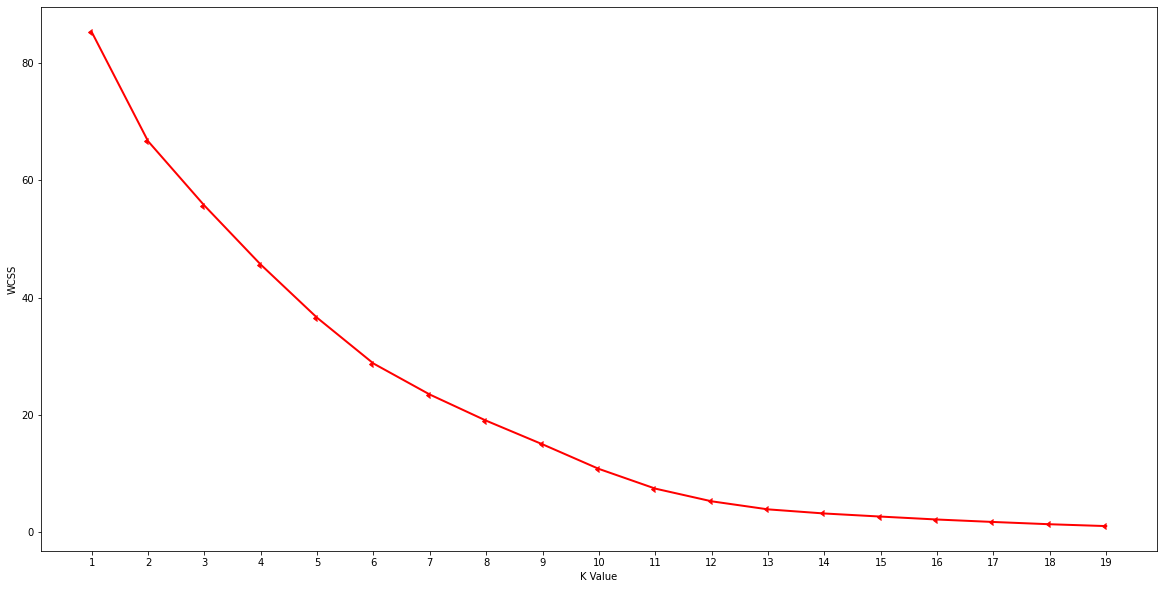

In [141]:
#for codes
from sklearn.cluster import KMeans
wcss=[]
for k in range(1,20):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(tfidf)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(20,10))
plt.plot(range(1,20),wcss,linewidth=2,color='red',marker=8)
plt.xlabel('K Value')
plt.xticks(np.arange(1,20,1))
plt.ylabel('WCSS')
plt.show()

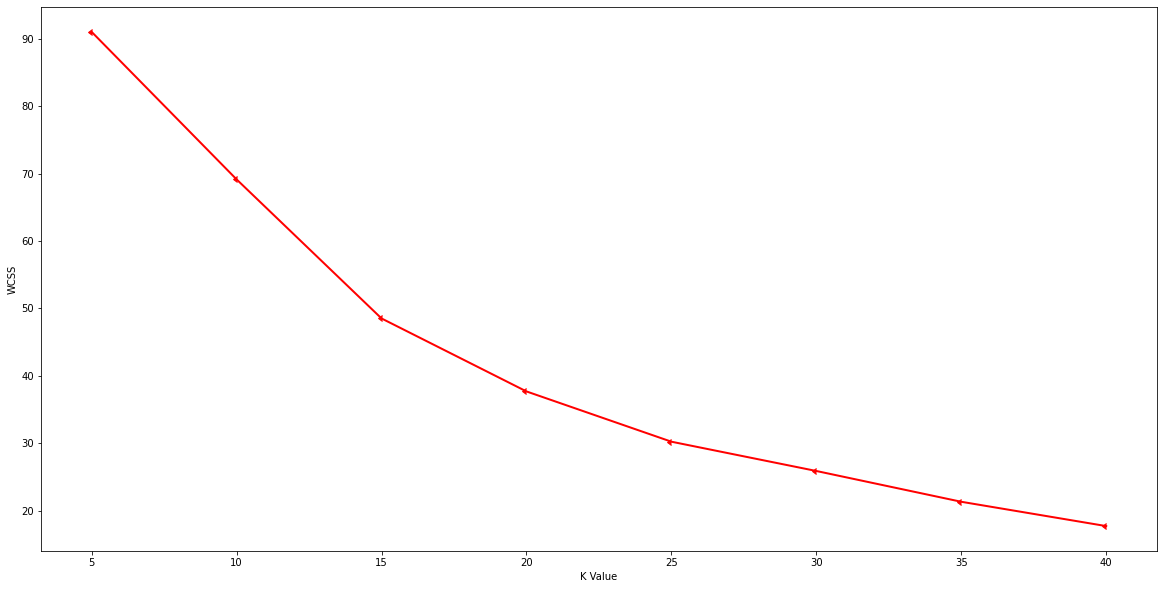

In [142]:
#for types
from sklearn.cluster import KMeans
wcss_type=[]
for k in range(5,41,5):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(tfidf_type)
    wcss_type.append(kmeans.inertia_)
plt.figure(figsize=(20,10))
plt.plot(range(5,41,5),wcss_type,linewidth=2,color='red',marker=8)
plt.xlabel('K Value')
plt.xticks(np.arange(5,41,5))
plt.ylabel('WCSS')
plt.show()

In [143]:
# initialize kmeans with 11 centroids
kmeans = KMeans(n_clusters=11, random_state=42)
# fit the model
kmeans.fit(tfidf)
# store cluster labels in a variable
clusters = kmeans.labels_

In [144]:
# initialize kmeans with 3 centroids
kmeans_type = KMeans(n_clusters=15, random_state=42)
# fit the model
kmeans_type.fit(tfidf_type)
# store cluster labels in a variable
clusters_type = [] 
for i in kmeans_type.labels_:
    clusters_type.append('t'+str(i))

In [145]:
from sklearn.decomposition import PCA

# initialize PCA with 2 components
pca = PCA(n_components=2, random_state=42)
# pass our X to the pca and store the reduced vectors into pca_vecs
pca_vecs = pca.fit_transform(tfidf.toarray())
# save our two dimensions into x0 and x1
x0 = pca_vecs[:, 0]
x1 = pca_vecs[:, 1]

In [146]:
# initialize PCA with 2 components
pca_type = PCA(n_components=2, random_state=42)
# pass our X to the pca and store the reduced vectors into pca_vecs
pca_vecs_type = pca_type.fit_transform(tfidf_type.toarray())
# save our two dimensions into x0 and x1
x0_type = pca_vecs_type[:, 0]
x1_type = pca_vecs_type[:, 1]

In [147]:
codes['cluster_codes'] = clusters
codes['x0_codes'] = x0
codes['x1_codes'] = x1

In [148]:
types['cluster_types'] = clusters_type
types['x0_types'] = x0_type
types['x1_types'] = x1_type

In [149]:
codes = codes[['code','code_description','cleaned','cluster_codes']]

In [150]:
types = types[['type','type_description','cleaned','cluster_types']]

In [151]:
merged.columns

Index(['client_id', 'code', 'type', 'sum', 'target', 'date_time', 'week_day',
       'friday', 'monday', 'saturday', 'sunday', 'thursday', 'tuesday',
       'wednesday', 'sum_type'],
      dtype='object')

In [152]:
merged = pd.merge(merged,codes, on='code')
merged = pd.merge(merged,types,on='type')
merged

,client_id,code,type,sum,target,date_time,week_day,friday,monday,saturday,...,thursday,tuesday,wednesday,sum_type,code_description,cleaned_x,cluster_codes,type_description,cleaned_y,cluster_types
0,22899,5541,1010,-4491.83,1,2014-05-11 14:42:00,6,0,0,0,...,0,0,0,outcome,Станции техобслуживания,станции техобслуживания,1,Покупка. POS,покупка,t4
1,168767,5541,1010,-11229.58,1,2015-07-29 05:51:00,2,0,0,0,...,0,0,1,outcome,Станции техобслуживания,станции техобслуживания,1,Покупка. POS,покупка,t4
2,496551,5541,1010,-11723.68,1,2014-10-17 13:51:00,4,1,0,0,...,0,0,0,outcome,Станции техобслуживания,станции техобслуживания,1,Покупка. POS,покупка,t4
3,683284,5541,1010,-33598.90,1,2015-09-13 16:46:00,6,0,0,0,...,0,0,0,outcome,Станции техобслуживания,станции техобслуживания,1,Покупка. POS,покупка,t4
4,818174,5541,1010,-15362.06,1,2015-02-03 08:21:00,1,0,0,0,...,0,1,0,outcome,Станции техобслуживания,станции техобслуживания,1,Покупка. POS,покупка,t4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91720,94223809,4900,2320,-138926.73,0,2015-08-26 14:21:00,2,0,0,0,...,0,0,1,outcome,"Коммунальные услуги — электричество, газ, сани...",коммунальные услуги электричество газ санитари...,5,Безналичный перевод денежных средств через POS,безналичный перевод денежных средств,t12
91721,94500594,4900,2320,-5510.58,0,2015-06-06 15:52:00,5,0,0,1,...,0,0,0,outcome,"Коммунальные услуги — электричество, газ, сани...",коммунальные услуги электричество газ санитари...,5,Безналичный перевод денежных средств через POS,безналичный перевод денежных средств,t12
91722,94500594,4900,2320,-172184.70,0,2015-11-20 09:31:00,4,1,0,0,...,0,0,0,outcome,"Коммунальные услуги — электричество, газ, сани...",коммунальные услуги электричество газ санитари...,5,Безналичный перевод денежных средств через POS,безналичный перевод денежных средств,t12
91723,95852599,4900,2320,-2111.16,0,2015-08-21 12:37:00,4,1,0,0,...,0,0,0,outcome,"Коммунальные услуги — электричество, газ, сани...",коммунальные услуги электричество газ санитари...,5,Безналичный перевод денежных средств через POS,безналичный перевод денежных средств,t12


In [153]:
t_name = []
for i in range(0,15):
    t_name.append ('t'+str(i))


In [154]:
clients = pd.DataFrame(set(merged['client_id']),columns=['client_id'])

In [155]:
for i in range(0,11):
    clients[i] = np.zeros(6000)

In [156]:
for i in t_name:
    clients[i] = np.zeros(6000)

In [157]:
clients=clients.astype(int)


In [158]:
import collections

In [159]:
clients = clients.set_index('client_id')

In [160]:
for i in set(merged['client_id']):
    list1 = merged[merged['client_id']==i]['cluster_codes']
    occurrences = collections.Counter(list1)
    for j in occurrences.keys():
        clients.loc[i,j]+=occurrences[j]

In [161]:
for i in set(merged['client_id']):
    list1 = merged[merged['client_id']==i]['cluster_types']
    occurrences = collections.Counter(list1)
    for j in occurrences.keys():
        clients.loc[i,j]+=occurrences[j]

In [162]:
clients.head()

,0,1,2,3,4,5,6,7,8,9,...,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14
client_id,,,,,,,,,,,,,,,,,,,,,
87851013,0,10,3,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,0
73334791,0,1,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
83427342,0,11,5,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,4,0
36634640,0,6,3,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,2,0
64684055,0,13,0,0,0,0,0,0,0,0,...,0,4,0,0,0,0,0,0,6,0


In [163]:
clients = pd.merge(clients,train_set,on='client_id')

In [167]:
clients= pd.merge(clients, merged1, on='client_id')

In [169]:
X = clients.drop('target',axis=1)
y=clients['target']

In [170]:
from sklearn.model_selection import train_test_split

In [171]:
X.shape

(6000, 36)

In [230]:
X.head()

,client_id,0,1,2,3,4,5,6,7,8,...,t14,friday,monday,saturday,sunday,thursday,tuesday,wednesday,income,outcome
0,87851013,0,10,3,0,0,0,0,0,0,...,0,1,2,1,1,2,3,3,0.00,-456219.40
1,73334791,0,1,2,0,0,0,0,0,0,...,0,1,0,1,1,0,0,0,0.00,-39999.76
2,83427342,0,11,5,0,0,0,0,0,0,...,0,2,1,5,4,3,2,0,0.00,-1933968.85
3,36634640,0,6,3,0,0,0,1,0,0,...,0,3,1,0,2,3,0,1,0.00,-53481.99
4,64684055,0,13,0,0,0,0,0,0,0,...,0,2,3,2,1,2,2,1,33688.74,-200523.70


# Supervised learning. Build model for prediction the gender of the clients. Decision Trees, KNN, Random Forest. Tune the hyper parameters, grid search, cross validation etc. Visualization of the models etc..

In [172]:
# Importing libraries needed to work with classification models

In [173]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_recall_curve as prc
from sklearn.metrics import roc_curve, roc_auc_score

## Building models and and making predictions

### Data Division

In [174]:
#We have chosen the division on 80/20. Where 80 is train data percentage and 20 is for test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Fitting the Data

Try to fit the decision tree with default hyperparameters, but with max_depth which is equal to 3. So that we can plot and read the tree.

In [175]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

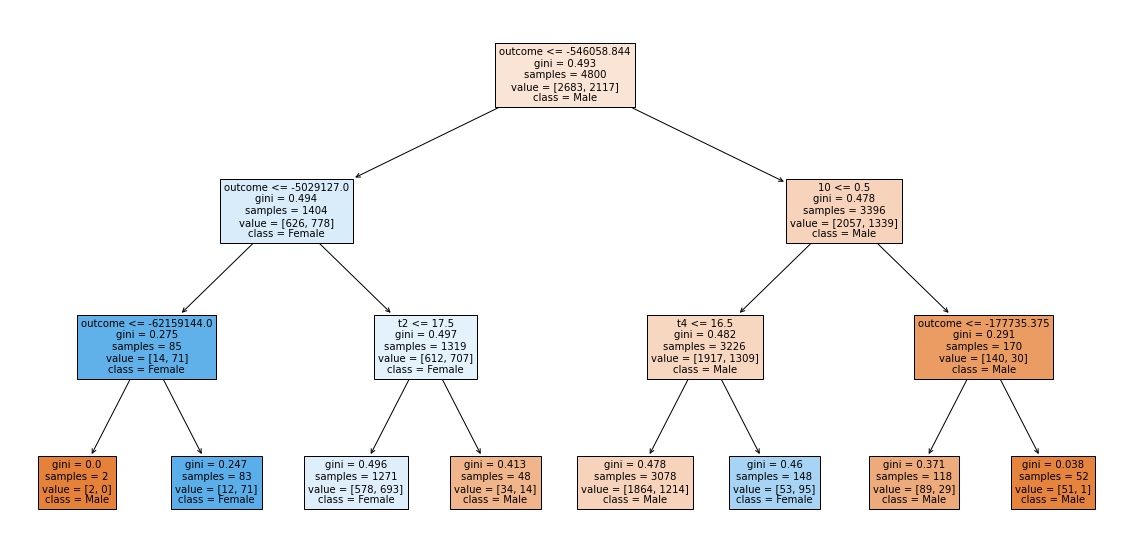

In [176]:
fig = plt.figure(figsize=(20,10))
_ = tree.plot_tree(dt,
                   feature_names=X.columns,
                   class_names=['Male', "Female"],
                   filled=True)

### Model Performance

Train data model performance

In [177]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)
print('Accuracy score',accuracy_score(y_train, y_train_pred))
print()
print('Confusion matrix:')
confusion_matrix(y_train, y_train_pred)

Accuracy score 0.6039583333333334

Confusion matrix:


array([[2040,  643],
       [1258,  859]], dtype=int64)

Test data model performance

In [178]:
print('Accuracy score',accuracy_score(y_test, y_test_pred))
print()
print('Confusion matrix:')
confusion_matrix(y_test, y_test_pred)

Accuracy score 0.5941666666666666

Confusion matrix:


array([[500, 157],
       [330, 213]], dtype=int64)

#### Function for plotting Decision Tree Graphs

In [179]:
def get_dt_graph(dt_classifier):
    fig = plt.figure(figsize=(25,20))
    _ = tree.plot_tree(dt_classifier,
                       feature_names=X.columns,
                       class_names=['No Disease', "Disease"],
                       filled=True)

#### Function for model Evaluation

In [180]:
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(dt_classifier.predict(X_train),y_train))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(X_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(dt_classifier.predict(X_test),y_test ))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(X_test)))

### Default Model

In [181]:
dt_default = DecisionTreeClassifier(random_state=42)
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

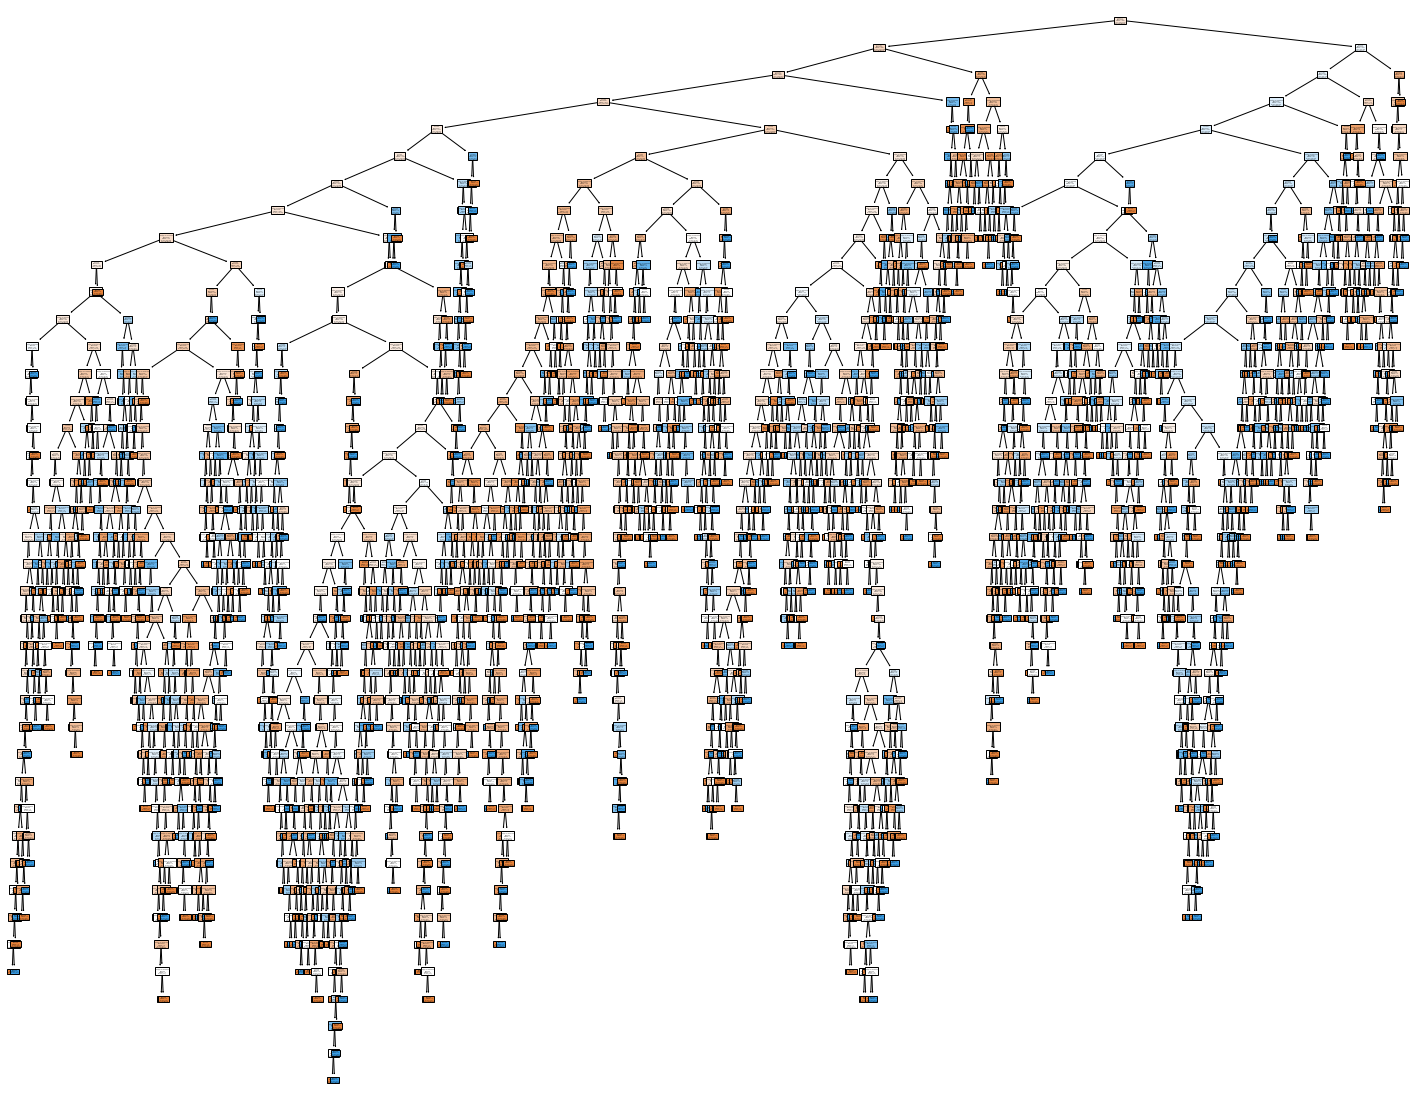

In [71]:
graphg_def = get_dt_graph(dt_default)

In [182]:
evaluate_model(dt_default)

Train Accuracy : 1.0
Train Confusion Matrix:
[[2683    0]
 [   0 2117]]
--------------------------------------------------
Test Accuracy : 0.5466666666666666
Test Confusion Matrix:
[[406 251]
 [293 250]]


### Hyper-parameter tuning

In [183]:
dt_estimator = DecisionTreeClassifier(random_state=42)

In [184]:
# Creating the parameters for searching of best hyper-parameters tune  
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

### Applying Grid Search

In [185]:
gs = GridSearchCV(estimator=dt_estimator, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")


In [186]:
gs.fit(X_train, y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [187]:
gs.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=10,
                       random_state=42)

In [188]:
dectree_best = gs.best_estimator_

In [189]:
evaluate_model(dectree_best)

Train Accuracy : 0.6035416666666666
Train Confusion Matrix:
[[2038  645]
 [1258  859]]
--------------------------------------------------
Test Accuracy : 0.5941666666666666
Test Confusion Matrix:
[[500 157]
 [330 213]]


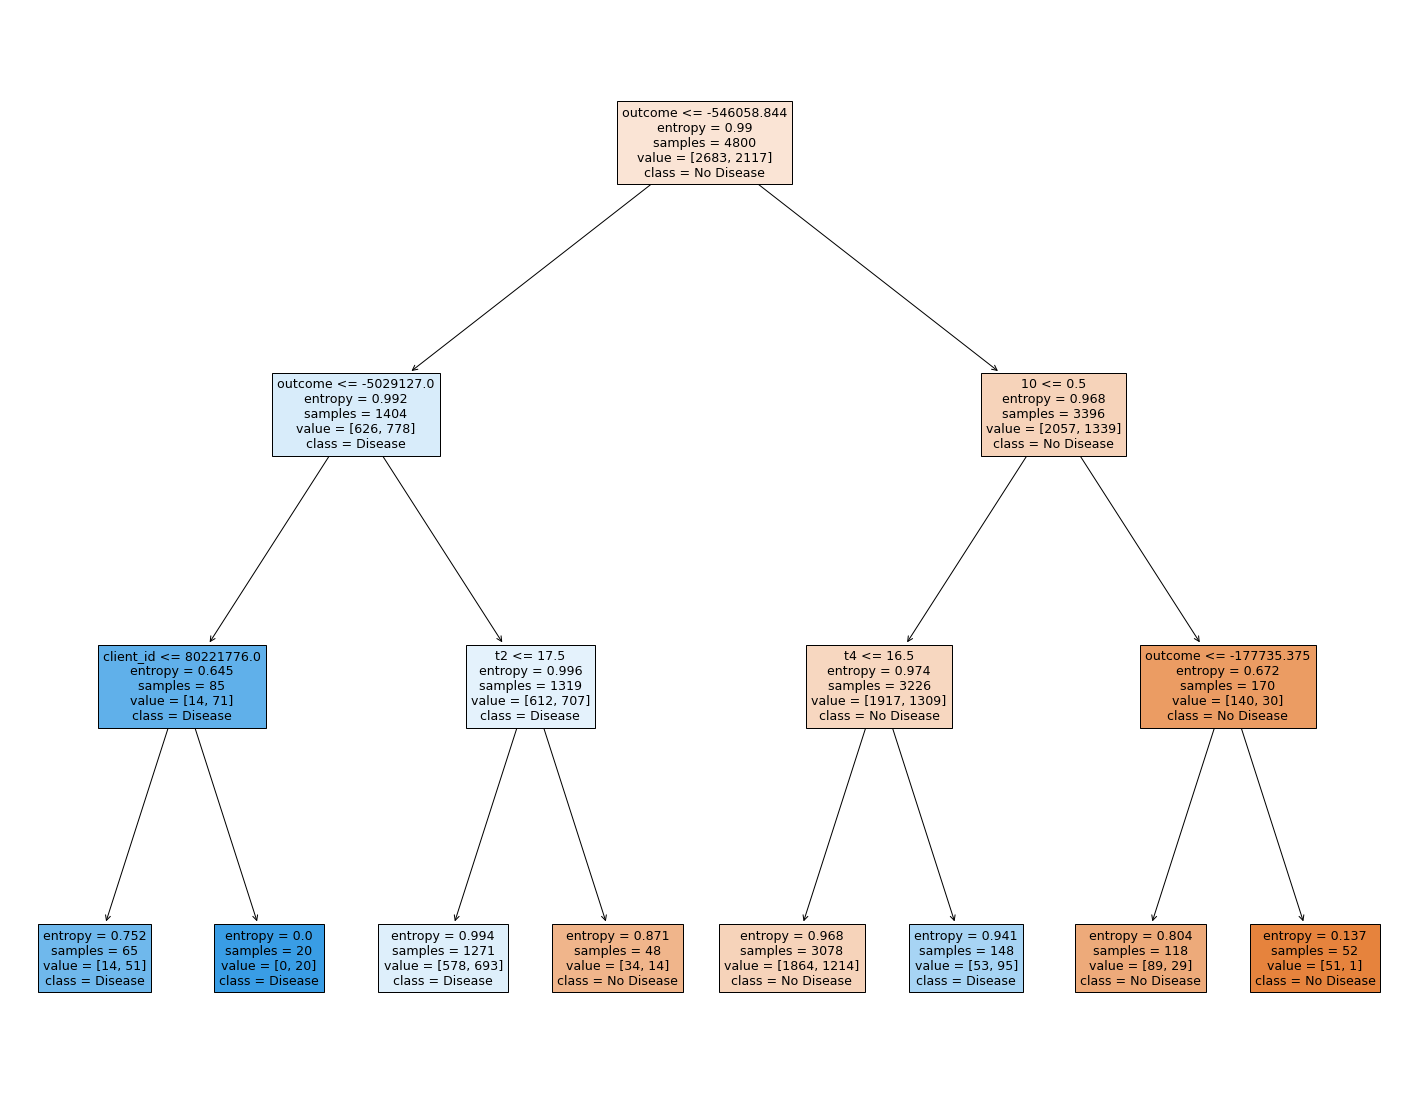

In [190]:
get_dt_graph(dectree_best)

In [191]:
y_pred = dectree_best.predict(X_test)

In [192]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.76      0.67       657
           1       0.58      0.39      0.47       543

    accuracy                           0.59      1200
   macro avg       0.59      0.58      0.57      1200
weighted avg       0.59      0.59      0.58      1200



### Precision-Recall Curve

In [193]:
precision, recall, thresholds = prc(y_test, y_pred)

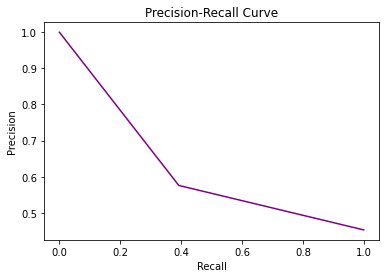

In [194]:
#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

### AUC/ROC score

In [195]:
print (roc_auc_score(y_test, y_pred))

0.5766501004902579


# KNN

In [196]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

### Without Hyper-parameters tuning

In [197]:
knn_df = KNeighborsClassifier()
knn_df.fit(X_train,y_train)
knn_y_pred=knn_df.predict(X_test)

In [198]:
#evaluation
evaluate_model(knn_df)

Train Accuracy : 0.6939583333333333
Train Confusion Matrix:
[[2107  576]
 [ 893 1224]]
--------------------------------------------------
Test Accuracy : 0.5183333333333333
Test Confusion Matrix:
[[432 225]
 [353 190]]


### With Hyper-parameters tuning

In [199]:
grid_params = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}


In [200]:
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)

In [201]:
g_res = gs.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


In [202]:
g_res.best_score_

0.55875

In [203]:
g_res.best_params_

{'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'uniform'}

In [204]:
knn = KNeighborsClassifier(n_neighbors = 15, weights = 'uniform',metric = 'minkowski')
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [205]:
evaluate_model(knn)

Train Accuracy : 0.634375
Train Confusion Matrix:
[[2137  546]
 [1209  908]]
--------------------------------------------------
Test Accuracy : 0.5266666666666666
Test Confusion Matrix:
[[468 189]
 [379 164]]


In [206]:
y_knn_pred = knn.predict(X_test)

### Precision-Recall Curve

In [207]:
precision_knn, recall_knn, thresholds_knn = prc(y_test, y_knn_pred)

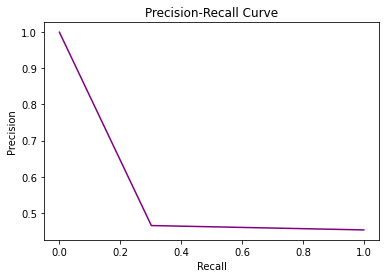

In [208]:
#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall_knn, precision_knn, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

### AUC/ROC score

In [209]:
print (roc_auc_score(y_test, y_knn_pred))

0.5071772749060269



## Random Forest

In [210]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

In [211]:
merged.head()

,client_id,code,type,sum,target,date_time,week_day,friday,monday,saturday,...,thursday,tuesday,wednesday,sum_type,code_description,cleaned_x,cluster_codes,type_description,cleaned_y,cluster_types
0,22899,5541,1010,-4491.83,1,2014-05-11 14:42:00,6,0,0,0,...,0,0,0,outcome,Станции техобслуживания,станции техобслуживания,1,Покупка. POS,покупка,t4
1,168767,5541,1010,-11229.58,1,2015-07-29 05:51:00,2,0,0,0,...,0,0,1,outcome,Станции техобслуживания,станции техобслуживания,1,Покупка. POS,покупка,t4
2,496551,5541,1010,-11723.68,1,2014-10-17 13:51:00,4,1,0,0,...,0,0,0,outcome,Станции техобслуживания,станции техобслуживания,1,Покупка. POS,покупка,t4
3,683284,5541,1010,-33598.90,1,2015-09-13 16:46:00,6,0,0,0,...,0,0,0,outcome,Станции техобслуживания,станции техобслуживания,1,Покупка. POS,покупка,t4
4,818174,5541,1010,-15362.06,1,2015-02-03 08:21:00,1,0,0,0,...,0,1,0,outcome,Станции техобслуживания,станции техобслуживания,1,Покупка. POS,покупка,t4


In [212]:
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)
y_train = np.array(y_train)

In [213]:
rfc = RandomForestClassifier()
rfc.fit(X_train_scaled, y_train)


RandomForestClassifier()

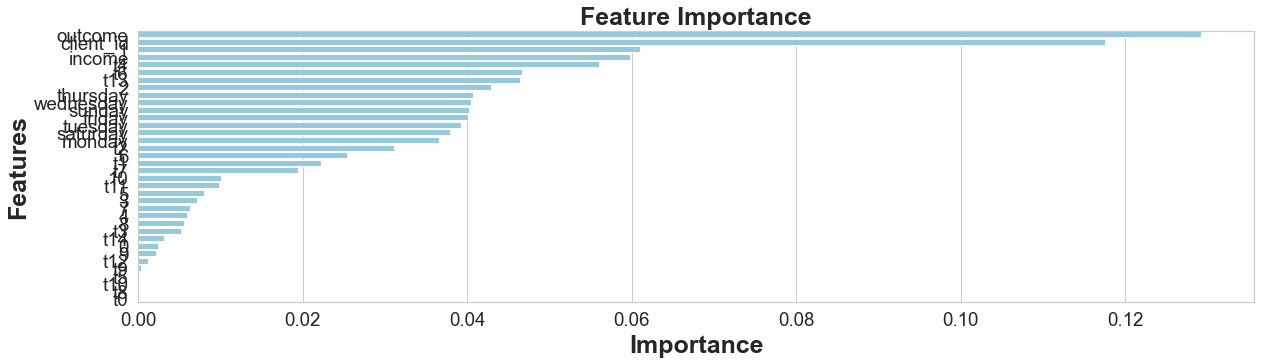

None

,Features,Gini-Importance
0,outcome,0.129200
1,client_id,0.117511
2,1,0.061041
3,income,0.059792
4,t4,0.055996
5,t6,0.046623
6,t13,0.046420
7,2,0.042900
8,thursday,0.040750
9,wednesday,0.040421


In [214]:
feats = {}
for feature, importance in zip(X.columns, rfc.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(20,5)
sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='skyblue')
plt.xlabel('Importance', fontsize=25, weight = 'bold')
plt.ylabel('Features', fontsize=25, weight = 'bold')
plt.title('Feature Importance', fontsize=25, weight = 'bold')
display(plt.show())
display(importances)

In [215]:
evaluate_model(rfc)

Train Accuracy : 0.443125
Train Confusion Matrix:
[[  20 2663]
 [  10 2107]]
--------------------------------------------------
Test Accuracy : 0.455
Test Confusion Matrix:
[[  6 651]
 [  3 540]]


### Hyperparameters tuning

In [216]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,4]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [217]:
# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


#### Applying Grid Search

In [218]:
rf_Model = RandomForestClassifier()

In [219]:
rf_Grid = GridSearchCV(estimator = rf_Model, param_grid = param_grid, cv = 3, verbose=1, n_jobs = -1)

In [220]:
rf_Grid.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 320 candidates, totalling 960 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]},
             verbose=1)

In [221]:
rf_Grid.best_params_

{'bootstrap': True,
 'max_depth': 4,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 33}

In [222]:
rf_best_Model = RandomForestClassifier(bootstrap=True,max_depth=4,max_features='auto',min_samples_leaf=2,
 min_samples_split = 5,
 n_estimators= 72)
rf_best_Model.fit(X_train,y_train)

RandomForestClassifier(max_depth=4, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=72)

In [223]:
evaluate_model(rf_best_Model)

Train Accuracy : 0.6233333333333333
Train Confusion Matrix:
[[2416  267]
 [1541  576]]
--------------------------------------------------
Test Accuracy : 0.5908333333333333
Test Confusion Matrix:
[[574  83]
 [408 135]]


In [225]:
y_pred_rfc = rf_best_Model.predict(X_test)

#### Precision-Recall Curve

In [226]:
precision_rfc, recall_rfc, thresholds_rfc = prc(y_test, y_pred_rfc)

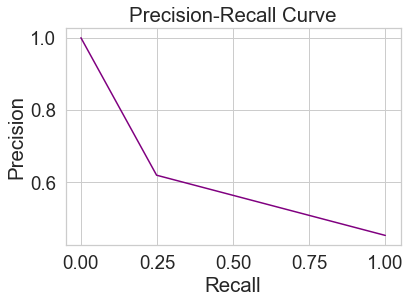

In [227]:
#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall_rfc, precision_rfc, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

#### AUC/ROC score

In [228]:
roc_auc_score(y_test, y_pred_rfc)

0.5611434866335343

# Conclusion

We have used 3 models for predicting the gender of clients: Decision Tree, KNearestNeighbor, and Random Forest.
From every model we've got the next accuracies:
1. Decision Tree
a). Default Test Accuracy - *0.5488113716199657*. b). Best hyper-parameters used Test Accuracy: *0.5487841407292433*
2. K-Nearest-Neigbor
a). Default Test Accuracy - *0.5183127740108379*. b). Best hyper-parameters used Test Accuracy: *0.5129482885385181*
3. Random Forest
a). Default Test Accuracy - *0.5074748795033086*. b). Best hyper-parameters used Test Accuracy: *0.5308662146338807*


### Then we conclude that the best model for predicting the gender is Default Decision tree, because of its score in almost 55%